# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load the datasets
cast = pd.read_csv("data/cast.csv")
release_dates = pd.read_csv("data/release_dates.csv")
titles = pd.read_csv("data/titles.csv")


In [4]:
# Step 3: Quick verification
print("Cast dataset shape:", cast.shape)
print("Release dates dataset shape:", release_dates.shape)
print("Titles dataset shape:", titles.shape)

# Display the first few rows of each dataset to confirm successful load
display(cast.head(), release_dates.head(), titles.head())

Cast dataset shape: (3442902, 6)
Release dates dataset shape: (443486, 4)
Titles dataset shape: (226013, 2)


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [6]:
# Basic info for each dataset
print("===== CAST DATASET =====")
cast.info()
print("\nMissing values per column:\n", cast.isna().sum())
print("\nPreview:\n", cast.head())

print("\n\n===== RELEASE DATES DATASET =====")
release_dates.info()
print("\nMissing values per column:\n", release_dates.isna().sum())
print("\nPreview:\n", release_dates.head())

print("\n\n===== TITLES DATASET =====")
titles.info()
print("\nMissing values per column:\n", titles.isna().sum())
print("\nPreview:\n", titles.head())

# Summary statistics (numeric columns only)
print("\n\n===== BASIC DESCRIPTIVE STATS =====")
print("Cast:")
display(cast.describe(include='all').transpose())
print("\nRelease Dates:")
display(release_dates.describe(include='all').transpose())
print("\nTitles:")
display(titles.describe(include='all').transpose())

# Annotated summary (markdown-style output)
from IPython.display import Markdown as md

summary_text = f"""
### Summary

- **Cast dataset:** {len(cast):,} records: contains information on actors, roles, and their billing/order in each movie.  

- **Release Dates dataset:** {len(release_dates):,} records: links each movie to its release date(s) and countries.  

- **Titles dataset:** {len(titles):,} records: central reference table with movie metadata.  

"""

display(md(summary_text))

===== CAST DATASET =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB

Missing values per column:
 title              6
year               0
name               0
type               0
character          8
n            1327783
dtype: int64

Preview:
                   title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutte

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,3442896,168254,Around the World in 80 Days,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3442902.0,NaN,NaN,NaN,1987.596831,28.376121,1894.0,1967.0,1999.0,2011.0,2115.0
name,3442902,1265147,Bess Flowers,820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,3442902,2,actor,2317612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
character,3442894,1476993,Himself,19637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n,2115119.0,NaN,NaN,NaN,16.73178,32.090997,1.0,5.0,10.0,21.0,33613.0



Release Dates:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,443485,125163,Fantastic Four,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,443486.0,NaN,NaN,NaN,1985.554863,28.373819,1894.0,1964.0,1997.0,2010.0,2115.0
country,443486,200,USA,42241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,443486,35433,2014-10-16,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Titles:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,226012,207630,Hamlet,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,226013.0,NaN,NaN,NaN,1985.281294,29.816257,1894.0,1965.0,1994.0,2011.0,2115.0



### Summary

- **Cast dataset:** 3,442,902 records: contains information on actors, roles, and their billing/order in each movie.  

- **Release Dates dataset:** 443,486 records: links each movie to its release date(s) and countries.  

- **Titles dataset:** 226,013 records: central reference table with movie metadata.  



Summary

After examining the three IMDb datasets, the following observations can be made:

Cast Dataset  
- Contains 3,442,902 records and 6 columns (title, year, name, type, character, n).  
- Describes individual cast members and their roles for each film.  
- The n column appears to represent billing order, which can help identify leading roles.  
- Some missing values are present in character and n, which is typical for incomplete credit data.  
- Overall, this dataset is large and provides detailed person-level information.

Release Dates Dataset  
- Contains 443,486 records and 4 columns (title, year, country, date).  
- Provides release dates of each film by country.  
- The date field follows a standard YYYY-MM-DD format, though some missing or inconsistent values may occur for older entries.  
- Useful for identifying international release patterns or the earliest release dates per title.

Titles Dataset  
- Contains 226,013 records and 2 columns (title, year).  
- Serves as the master list of films and their release years.  
- Clean and concise, with very few missing values, making it ideal as the base dataset for merging with cast or release data.

Notes  
- The datasets are clean and properly structured with consistent column names (title, year) for merging.  
- Most missing data appear in optional or descriptive fields (character, n, or date).  
- Together, they form a comprehensive view of movies, their casts, and release history.

### 2. How many movies have the title North by Northwest

In [9]:
north_by_northwest_count = titles[titles['title'] == 'North by Northwest'].shape[0]
print("Number of movies titled 'North by Northwest':", north_by_northwest_count)

Number of movies titled 'North by Northwest': 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [11]:
hamlet_movies = titles[titles['title'] == 'Hamlet']

# Count how many versions exist
num_hamlet_versions = hamlet_movies.shape[0]

# Find the earliest and latest years
first_year = hamlet_movies['year'].min()
last_year = hamlet_movies['year'].max()

print("Number of versions of 'Hamlet':", num_hamlet_versions)
print("First version year:", first_year)
print("Most recent version year:", last_year)

Number of versions of 'Hamlet': 20
First version year: 1910
Most recent version year: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [13]:
treasure_island_movies = titles[titles['title'] == 'Treasure Island'].sort_values(by='year')
display(treasure_island_movies)

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [15]:
years_to_check = [1950, 1980, 2000]

movies_per_year = titles[titles['year'].isin(years_to_check)] \
    .groupby('year')['title'].count()

print(movies_per_year)

year
1950    1109
1980    1750
2000    2568
Name: title, dtype: int64


Movies released increased substantially from 1950 to 2000, reflecting the growth of the film industry, advancements in technology, and the rise of new markets and production companies. This trend suggests that filmmaking became more accessible and diversified over time.

### 6. How big was the cast of Metropolis


In [18]:

metropolis_cast_size = cast[cast['title'] == 'Metropolis'].shape[0]
print("Number of cast members in 'Metropolis':", metropolis_cast_size)

Number of cast members in 'Metropolis': 33


### 7. How many roles for actors were there 1950's? 1990's

In [20]:

actors_1950s = cast[(cast['type'] == 'actor') & (cast['year'].between(1950, 1959))].shape[0]
actors_1990s = cast[(cast['type'] == 'actor') & (cast['year'].between(1990, 1999))].shape[0]
print("Actor roles in 1950s:", actors_1950s)
print("Actor roles in 1990s:", actors_1990s)

Actor roles in 1950s: 153559
Actor roles in 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

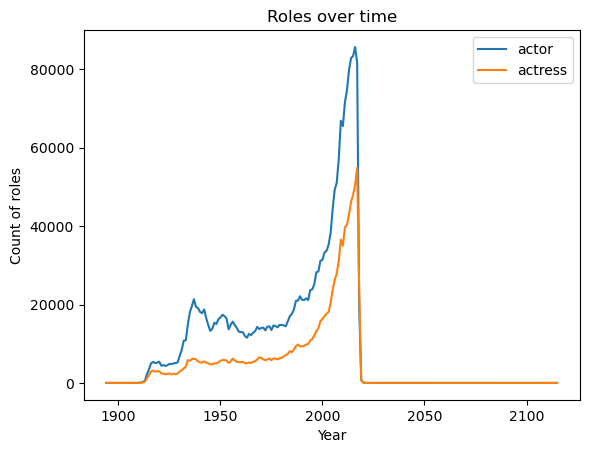

In [22]:

roles_over_time = (
    cast[cast['type'].isin(['actor', 'actress'])]
    .groupby(['year','type'])['name']
    .count()
    .unstack('type', fill_value=0)
    .sort_index()
)

plt.figure()
plt.plot(roles_over_time.index, roles_over_time.get('actor', 0), label='actor')
plt.plot(roles_over_time.index, roles_over_time.get('actress', 0), label='actress')
plt.title('Roles over time')
plt.xlabel('Year')
plt.ylabel('Count of roles')
plt.legend()
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [24]:
# Treat leading role as billing order n == 1
leading_2000s = cast[(cast['year'].between(2000, 2009)) & (cast['n'] == 1)].shape[0]
print("Leading roles in 2000s:", leading_2000s)

Leading roles in 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [26]:

no_rank_2000s = cast[(cast['year'].between(2000, 2009)) & (cast['n'].isna())].shape[0]
no_rank_1950s = cast[(cast['year'].between(1950, 1959)) & (cast['n'].isna())].shape[0]
print("No-ranking roles in 2000s:", no_rank_2000s)
print("No-ranking roles in 1950s:", no_rank_1950s)

No-ranking roles in 2000s: 232037
No-ranking roles in 1950s: 95406


In the 2000s, there were 232,037 roles without a ranking, compared to 95,406 in the 1950s.  
This shows a large increase in unranked roles over time, which likely reflects the overall growth of the film industry and the higher number of credited cast members in modern productions.

### 11. Plot the number of films made in each decade

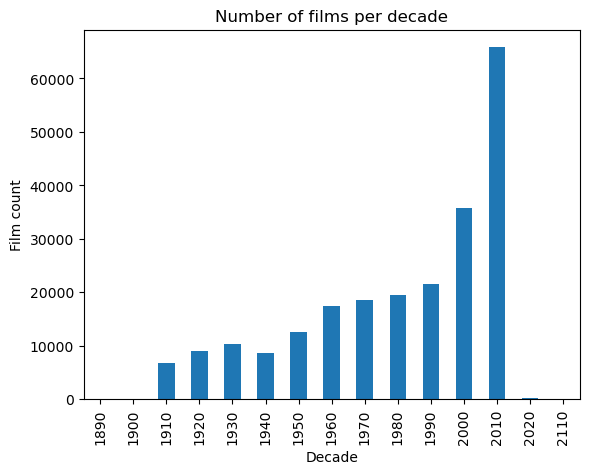

In [29]:

def to_decade(y): 
    return (y // 10) * 10

films_per_decade = titles.dropna(subset=['year']).assign(decade=titles['year'].apply(to_decade)) \
    .groupby('decade')['title'].count()

plt.figure()
films_per_decade.sort_index().plot(kind='bar')
plt.title('Number of films per decade')
plt.xlabel('Decade')
plt.ylabel('Film count')
plt.show()

### 12. Plot the number of films with a Rustler character over time

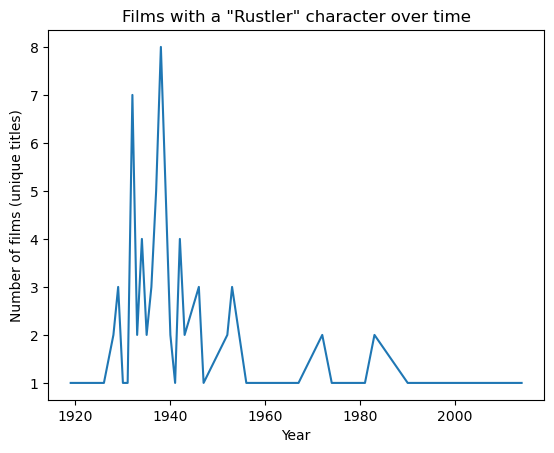

In [31]:
rustler = cast[cast['character'].astype(str).str.contains(r'\brustler\b', case=False, na=False)]
rustler_per_year = rustler.groupby('year')['title'].nunique().sort_index()

plt.figure()
plt.plot(rustler_per_year.index, rustler_per_year.values)
plt.title('Films with a "Rustler" character over time')
plt.xlabel('Year')
plt.ylabel('Number of films (unique titles)')
plt.show()

### 13. What are the top ten character names of all time?

In [33]:

top_characters = (
    cast['character']
    .dropna()
    .astype(str)
    .str.strip()
    .value_counts()
    .head(10)
)
top_characters

character
Himself        19673
Dancer         12027
Extra          10848
Reporter        7818
Doctor          6971
Party Guest     6787
Student         6637
Policeman       6426
Bartender       6292
Herself         6281
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [35]:

actors_90s = cast[(cast['type'] == 'actor') & (cast['year'].between(1990, 1999))]
actor_by_films = actors_90s.groupby('name')['title'].nunique().sort_values(ascending=False)
top_actor_90s = actor_by_films.index[0]
top_actor_90s_count = actor_by_films.iloc[0]
print("Top 1990s actor by number of films:", top_actor_90s, "with", top_actor_90s_count, "films")

Top 1990s actor by number of films: Shakti Kapoor with 130 films


### 15. What are the top 10 roles that start with Science?

In [37]:

science_roles = (
    cast['character']
    .dropna()
    .astype(str)
    .str.strip()
    .str.extract(r'^(Science.*)', expand=False)
    .dropna()
    .value_counts()
    .head(10)
)
science_roles

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [39]:
largest_cast = cast.groupby('title')['name'].count().sort_values(ascending=False).head(1)
largest_cast

title
Around the World in 80 Days    1364
Name: name, dtype: int64

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [41]:

cast_size = cast.groupby('title')['name'].count()
display(cast_size.describe())

count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: name, dtype: float64

Most films have relatively small casts. The mean of the cast size is 20, meaning the average movie has 20 cast members.
The cast range is wide. The minimum cast is 1 and the maximum is 1364 in the movie Around the World in 80 Days. I believe this demonstrate that the movie is an outlier when it comes to cast size. 

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [44]:
natalie_films_per_year = cast[cast['name'] == 'Natalie Portman'].groupby('year')['title'].nunique()
display(natalie_films_per_year)

year
1995    1
1996    3
1999    2
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    1
2007    3
2008    1
2009    2
2010    3
2011    3
2013    1
2015    4
2016    3
2017    1
Name: title, dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [46]:
# Top star = n == 1, co-star = n == 2
natalie_leading_roles = cast[(cast['name'] == 'Natalie Portman') & (cast['n'].isin([1, 2]))]
natalie_leading_per_year = natalie_leading_roles.groupby('year')['title'].nunique()
display(natalie_leading_per_year)

year
1999    1
2000    1
2002    1
2005    3
2006    1
2007    1
2008    1
2009    1
2010    1
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

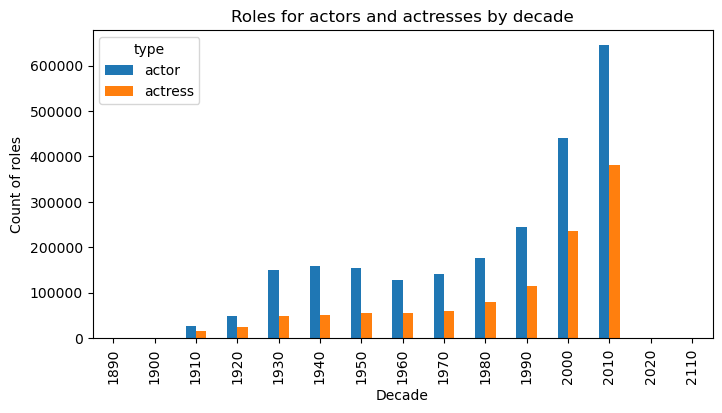

In [48]:
def to_decade(y): 
    return (y // 10) * 10

roles_by_decade = (
    cast[cast['type'].isin(['actor', 'actress'])]
    .assign(decade=cast['year'].apply(to_decade))
    .groupby(['decade', 'type'])['name']
    .count()
    .unstack('type', fill_value=0)
)

roles_by_decade.plot(kind='bar', figsize=(8,4))
plt.title('Roles for actors and actresses by decade')
plt.xlabel('Decade')
plt.ylabel('Count of roles')
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [50]:
release_dates['date'] = pd.to_datetime(release_dates['date'], errors='coerce')
release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()

release_pivot = pd.pivot_table(
    release_dates,
    index='month',
    columns='day_of_week',
    values='title',
    aggfunc='count',
    fill_value=0
)
display(release_pivot)

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,13559,3168,2868,1358,10625,1446,4650
August,13430,2844,2277,1138,9931,1121,4270
December,13020,3240,3357,1813,10666,1903,5097
February,13833,3138,2395,1277,10356,1190,4118
January,13734,3699,2925,1822,10746,1823,4663
July,11635,2267,2291,894,8947,1144,4243
June,11997,2337,2409,1031,9469,1179,4282
March,15268,3383,2742,1228,11844,1313,4479
May,13198,3050,2270,1165,10100,1377,4289


The data shows that most movies are released on Friday and Thursday. Tuesday and Sunday have the least amount of movies released. Moreover, the months of September, October and March have the most amount of movies released.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

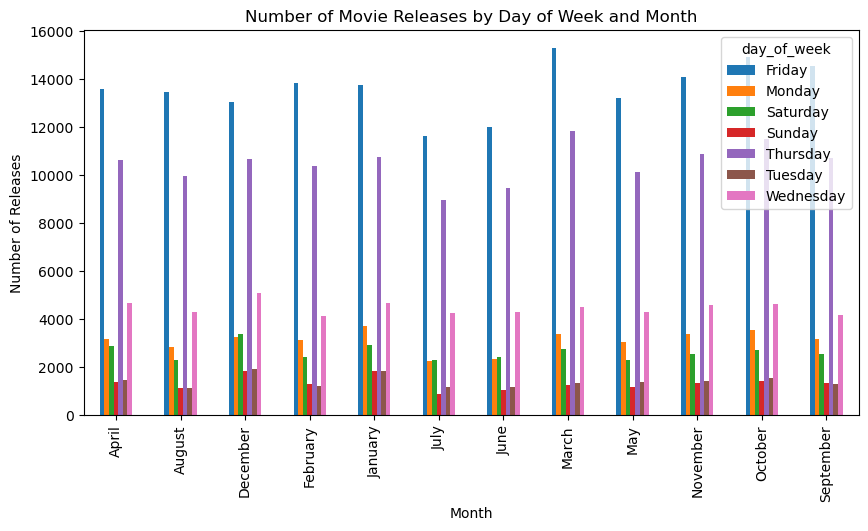

In [53]:
release_pivot.plot(kind='bar', figsize=(10,5))
plt.title('Number of Movie Releases by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.show()

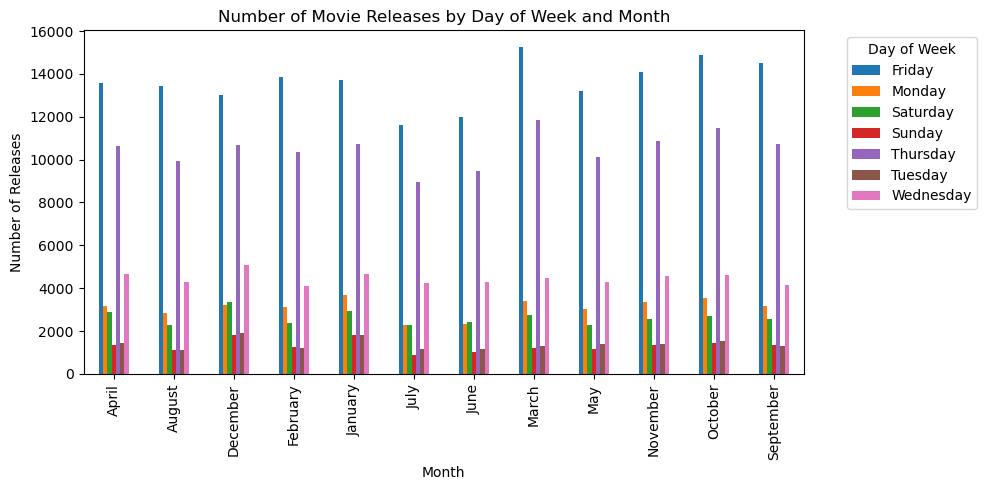

In [54]:
#fix: plot the pivot table with legend moved outside the graph
ax = release_pivot.plot(kind='bar', figsize=(10,5))

plt.title('Number of Movie Releases by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')

# Move legend outside the plot to the upper right
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [56]:
star_wars_actors = cast[cast['title'] == 'Star Wars']['name'].unique()
films_after_star_wars = cast[(cast['name'].isin(star_wars_actors)) & (cast['title'] != 'Star Wars')]

# Display a few examples of what those actors appeared in later
display(films_after_star_wars[['name', 'title', 'year']].sort_values(['name', 'year']).head(20))

,name,title,year
1165941,Al Lampert,Big Zapper,1973
1165942,Al Lampert,Hennessy,1975
1165943,Al Lampert,Licensed to Love and Kill,1979
1165946,Al Lampert,The Spaceman and King Arthur,1979
1165945,Al Lampert,The Killing Edge,1984
864876,Alan (III) Harris,Operation Crossbow,1965
864869,Alan (III) Harris,A Countess from Hong Kong,1967
864884,Alan (III) Harris,The Dirty Dozen,1967
864886,Alan (III) Harris,The Night of the Generals,1967
864877,Alan (III) Harris,Scrooge,1970
